In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(12,8)})
%matplotlib inline

In [5]:
presc = pd.read_csv('data_prep/rheumatoid.csv')
wards = pd.read_csv('data_prep/Wards.csv')

In [6]:
presc.head(n=3)

,LSOA_CODE,Patient_count,Total_prescriptions,YYYYMM
0,E01009300,2007.0,5197.985134,201901
1,E01014080,1470.0,3495.754202,201901
2,E01014081,1526.0,3157.451902,201901


(0.0, 10.407137492553023, 7.455876687491824, 7.473056194951883, 0.4005559777600831)


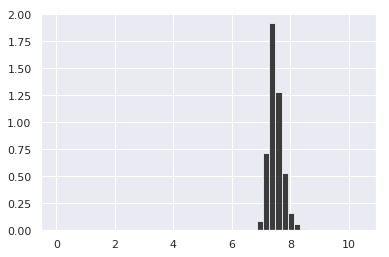

In [7]:
# the histogram of the data
data = np.log(presc['Patient_count'])
n, bins, patches = plt.hist(data , 50, density=True, facecolor='black', alpha=0.75)
print(np.min(data), np.max(data) ,  np.median(data), np.mean(data), np.std(data))
plt.grid(True)
plt.show()

(0.4812902200683245, 75588.8069924969, 3348.0263036565475, 3517.817416806023, 1642.2252844888133)


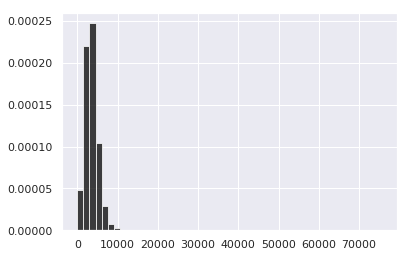

In [8]:
# the histogram of the data
data = (presc['Total_prescriptions'])
n, bins, patches = plt.hist(data , 50, density=True, facecolor='black', alpha=0.75)
print(np.min(data), np.max(data) ,  np.median(data), np.mean(data), np.std(data))
plt.grid(True)
plt.show()

In [9]:
wards.head(n=3)

,Unnamed: 0,LSOA11CD,WD15CD,WD15NM,LAD15CD,LocalAuthorityName,CityName
0,0,E01000104,E05000041,Village,E09000002,Barking and Dagenham,London
1,1,E01000105,E05000041,Village,E09000002,Barking and Dagenham,London
2,2,E01000106,E05000041,Village,E09000002,Barking and Dagenham,London


In [10]:
london_LSOAs = wards[wards['CityName'] == 'London']

In [11]:
London_preac = presc[presc['LSOA_CODE'].isin(london_LSOAs['LSOA11CD'])]

In [12]:
London_preac.sort_values(by=['YYYYMM'],inplace=True)

/10TBdrive/sagarj/anaconda3/envs/env_py2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
area_dict = {'YYYYMM':[], 'mean_count':[]}
for name , group in London_preac.groupby('YYYYMM'):
    area_dict['YYYYMM'].append(name)
    area_dict['mean_count'].append((np.sum(group['Total_prescriptions'])/np.sum(group['Patient_count'])))
area_df = pd.DataFrame.from_dict(area_dict)
area_df.sort_values(by=['YYYYMM'],inplace=True)

([<matplotlib.axis.XTick at 0x7f35ec4a2cd0>,
 <a list of 74 Text xticklabel objects>)

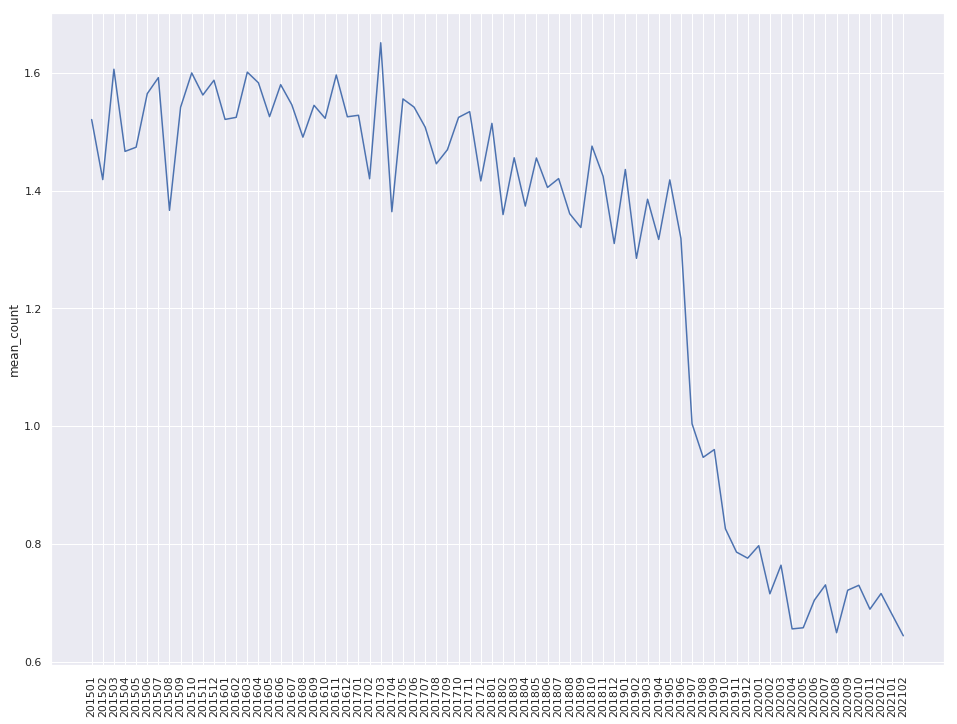

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 12)
sns.set_style("white")
sns.lineplot(y=area_df['mean_count'],x=np.arange(0,len(area_df),1))
plt.xticks(np.arange(0,len(area_df),1),area_df['YYYYMM'],rotation=90)